# Example of how to use the Orca wrapper


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import logging

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
from rdkit.Chem.MolStandardize import rdMolStandardize

In [4]:
try:
    import ppqm
except ModuleNotFoundError:
    import pathlib

    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import ppqm

In [5]:
from ppqm import orca

## Set logging level

In [6]:
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger("ppqm").setLevel(logging.INFO)
logging.getLogger("orca").setLevel(logging.DEBUG)
show_progress = True

In [7]:
_logger = logging.getLogger(__name__)

## Define a molecule you like

In [8]:
smiles = "C([C@@H](C(=O)O)N)O"  # I like serine
molobj = Chem.MolFromSmiles(smiles)

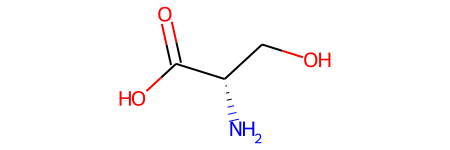

In [9]:
molobj

## Define an Orca calculator object

In [10]:
orca_options = {
    "scr": "./_tmp_directory_",  # Where should the calculations happen?
    "cmd": "orca",  # Where is the binary executable/command?
    "n_cores": 1,  # How many cores to use? Currently, only single core implemented
    "show_progress": True,  # Show progressbar during calculation
}

In [11]:
calc = orca.OrcaCalculator(**orca_options)
calc

OrcaCalc(cmd=orca, scr=_tmp_directory_, n_cores=1, memory=2gb)

## Define what you would like to calculate

In [12]:
# Optimize molecule in water
calculation_option = {
    "B3LYP": None,
    "def2-SVP": None,
    "D3BJ": None,
    "Hirshfeld": None,
    "CPCM": "water",
    "RIJCOSX": None,
    "def2/J": None,
    "Grid4": None,
    "GridX4": None,
    "NMR": None,
    "def2/JK": None
}

In [13]:
# Generate conformers
molobj_conf = ppqm.tasks.generate_conformers(molobj)

In [14]:
molobj_conf.GetNumConformers()

7

In [15]:
# Calculate energy of conformers
results = calc.calculate(molobj_conf, calculation_option)

orca(1): 100%|████████████████████████████████████| 7/7 [06:34<00:00, 56.30s/it]


In [16]:
# The output type
print(type(results))
print(type(results[0]))
print(results[0].keys())

<class 'list'>
<class 'dict'>
dict_keys(['scf_energy', 'mulliken_charges', 'loewdin_charges', 'hirshfeld_charges', 'shielding_constants'])


## Transfer the results into a Pandas dataframe

In [17]:
df = pd.DataFrame(results)
df

,scf_energy,mulliken_charges,loewdin_charges,hirshfeld_charges,shielding_constants
0,-250040.154966,"[0.21135, 0.023545, 0.163517, -0.30522, -0.264...","[0.073503, -0.034813, 0.115514, -0.257363, -0....","[0.051213, 0.036282, 0.238748, -0.34372, -0.21...","[124.232, 139.436, 2.643, -126.971, 147.001, 2..."
1,-250030.565547,"[0.186474, 0.024444, 0.204225, -0.287001, -0.3...","[0.072157, -0.036831, 0.141129, -0.23561, -0.1...","[0.054048, 0.02748, 0.247221, -0.32863, -0.238...","[121.717, 132.252, -4.882, -186.124, 175.966, ..."
2,-250034.485978,"[0.22269, 0.013351, 0.205325, -0.303632, -0.28...","[0.074807, -0.039603, 0.133517, -0.247873, -0....","[0.054159, 0.027102, 0.240122, -0.340616, -0.2...","[124.328, 136.57, 2.661, -143.065, 152.898, 23..."
3,-250033.890494,"[0.211904, 0.003249, 0.198013, -0.300371, -0.2...","[0.067639, -0.047667, 0.131571, -0.248344, -0....","[0.046955, 0.030837, 0.244865, -0.343788, -0.2...","[122.344, 136.958, -2.386, -150.349, 169.307, ..."
4,-250032.186412,"[0.197004, 0.047989, 0.178434, -0.327246, -0.2...","[0.067424, -0.033221, 0.122833, -0.26604, -0.1...","[0.046428, 0.035691, 0.238702, -0.354257, -0.2...","[124.548, 134.705, -1.218, -123.465, 141.155, ..."
5,-250032.123110,"[0.222174, 0.006596, 0.211854, -0.300056, -0.2...","[0.067958, -0.025526, 0.140313, -0.235256, -0....","[0.04345, 0.036576, 0.25426, -0.314273, -0.224...","[122.432, 137.108, -4.065, -164.531, 177.92, 2..."
6,-250038.630875,"[0.194298, -0.013324, 0.193708, -0.318859, -0....","[0.059913, -0.026989, 0.114525, -0.263269, -0....","[0.049405, 0.034503, 0.226333, -0.355265, -0.2...","[126.138, 139.513, 4.831, -95.13, 135.983, 233..."
